## Модель Вольтерра–Лотке

$$ 
\left\{
\begin{array}{l}
\frac{\displaystyle dr}{\displaystyle dt} = 2r - \alpha r f \\ 
\frac{\displaystyle df}{\displaystyle dt} = -f + \alpha r f
\end{array}\\
\right.\\
$$
   
$$\\
    r(0) = r_0\\
    f(0) = f_0\\
$$
### Решение:
Для решения задачи нам нужно,\
написать функцию,на которую будут подаваться некоторые величины,\
решить систему дифференциальных уравнений,\
построить график зависимости $ f(t) $, $ r(t) $\
построить *фазовую траекторию* (траекторию в плоскости $(r,f)$).

In [1]:
import numpy as np
import math as m
import scipy.integrate as integr
import matplotlib.pyplot as plt

In [2]:
def model(y, t, a,b):
    dy=np.zeros((2,))
    
    r=y[0]
    f=y[1]
    
    dy[0]=2*r-a*r*f+b
    dy[1]=a*r*f-f
   
    
    return dy

In [3]:
def paint(r0,f0,a):
    y0=[]
    y0.append(r0)
    y0.append(f0)
    y0=np.array(y0)
    c=a
    b=0
    tmin=0 
    tmax=50
    T=np.arange(tmin,tmax,0.01)
    
    resh=integr.odeint(model, y0, T, args=(c,b))
    
    fig = plt.figure(figsize=(10,18))
    
    ax=fig.add_subplot(3,1,1)
    ax1=fig.add_subplot(3,1,2)
    ax2=fig.add_subplot(3,1,3)
    
    ax.plot(T, resh[:,0])
    ax1.plot(T, resh[:,1])
    ax2.plot(resh[:,0], resh[:,1])
    
    ax.set_xlabel('время', fontsize='15')
    ax.set_ylabel('кролики', fontsize='15')
    
    ax1.set_xlabel('время', fontsize='15')
    ax1.set_ylabel('лисы', fontsize='15')
    
    ax2.set_xlabel('кролики', fontsize='15')
    ax2.set_ylabel('лисы', fontsize='15')
    
   
    
    ax.grid()
    ax1.grid()
    ax2.grid()
    
    return r0,f0,a

1 тип фазовых траекторий, r0=f0


(1, 1, 0.01)

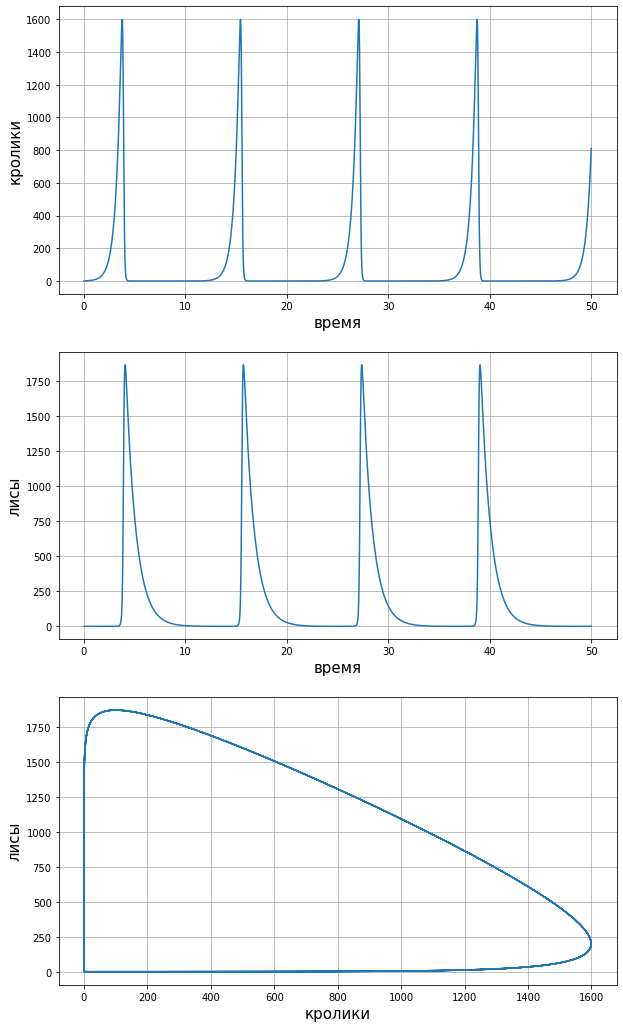

In [4]:
print('1 тип фазовых траекторий, r0=f0')
paint(320,520,0.01)

2 тип фазовых траекторий, r0>>f0(или просто очень большой, портрет примерно похож и при увеличении f0)
r0=6421(точность до единиц) выстраивается фазовый портрет
Ниже этого значения траектории вели себя не аналитично


(6421, 1, 0.01)

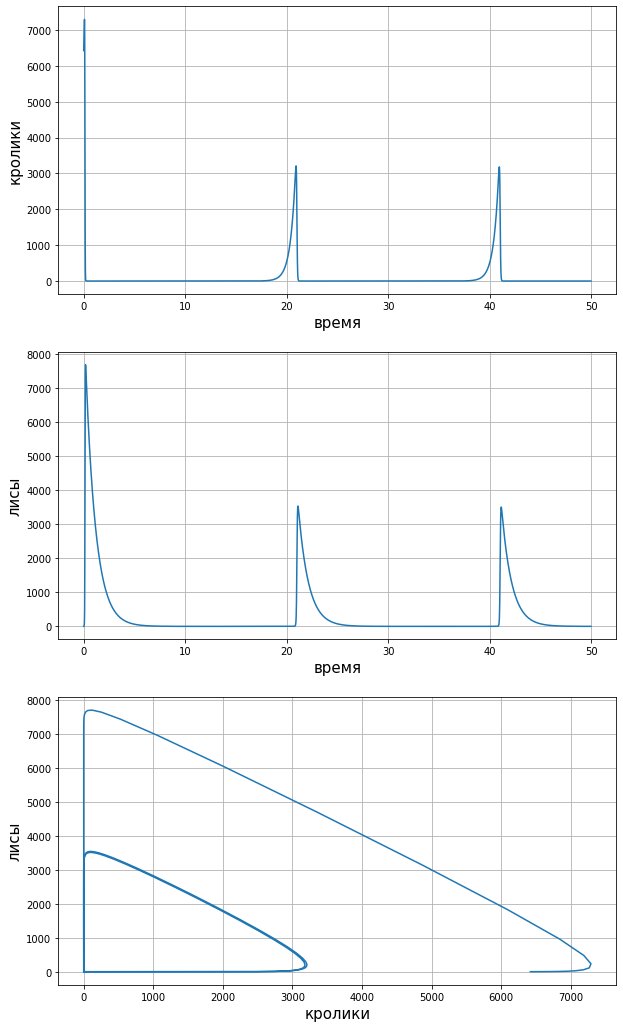

In [5]:
print('2 тип фазовых траекторий, r0>>f0(или просто очень большой, портрет примерно похож и при увеличении f0)\nr0=6421(точность до единиц) выстраивается фазовый портрет\nНиже этого значения траектории вели себя не аналитично')
paint(6421,320,0.01)

3 тип фазовых траекторий, f0>>r0
f0=5609(точность до единиц) выстраивается фазовый портрет
Ниже этого значения траектории вели себя не аналитично


(1, 5609, 0.01)

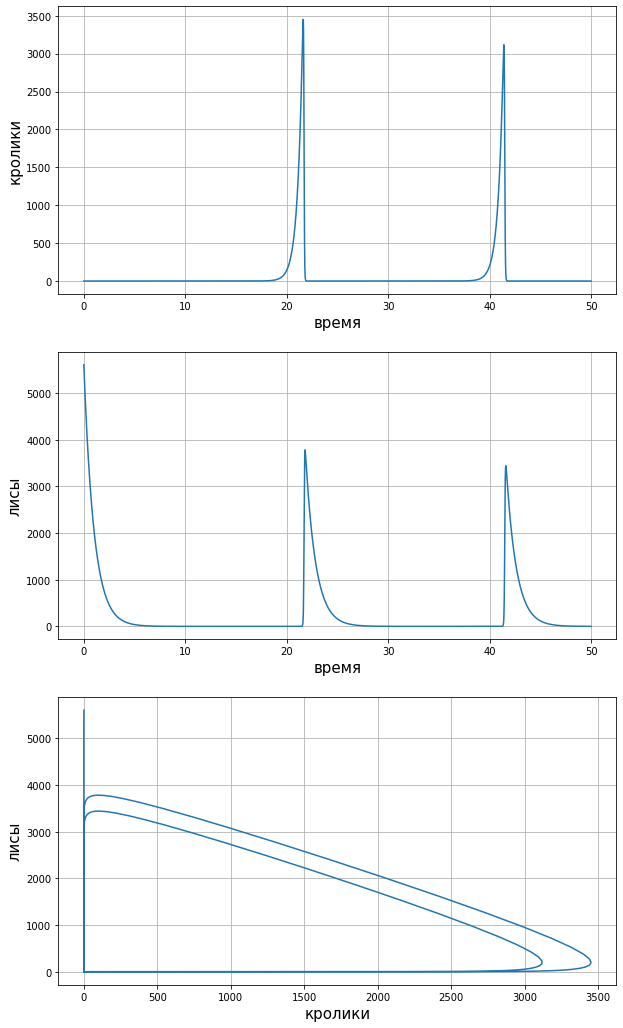

In [6]:
print('3 тип фазовых траекторий, f0>>r0\nf0=5609(точность до единиц) выстраивается фазовый портрет\nНиже этого значения траектории вели себя не аналитично')
paint(32,5609,0.01)

In [7]:
def phase_plane_analysys(r0,f0,a):
    y0=[]
    y0.append(r0)
    y0.append(f0)
    y0=np.array(y0)
    tmin=0 
    tmax=200
    T=np.arange(tmin,tmax,0.01)
    b=0
    resh=integr.odeint(model, y0, T, args=(a,b))
    return resh

In [8]:
def phase_plane(number):
    fig = plt.figure(figsize=(19,5))
    
    ax=fig.add_subplot(1,2,1)
    ax1=fig.add_subplot(1,2,2)
    for i in range(1,number,10):
        ax.plot(phase_plane_analysys(i,5,0.01)[:,0],phase_plane_analysys(i,5,0.01)[:,1])
    for j in range(1,number,10):
        ax1.plot(phase_plane_analysys(5,j,0.01)[:,0],phase_plane_analysys(5,j,0.01)[:,1])
            
    
    ax.grid()
    ax1.grid()
    ax.set_title('Множество фазовых траекторий(фиксирована популяция кроликов)')
    ax1.set_title('Множество фазовых траекторий(фиксирована популяция лис)')
    ax.set_xlabel('кролики')
    ax.set_ylabel('лисы')
    ax1.set_xlabel('кролики')
    ax1.set_ylabel('лисы')
    
    print('a=0.01')
    return number

a=0.01


1000

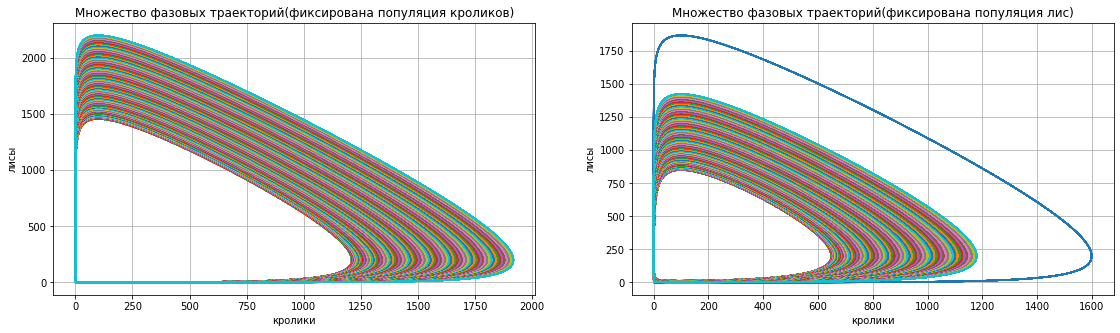

In [9]:
phase_plane(1000)

In [10]:
def phase_plane1(number):
    fig1=plt.figure(figsize=(10,8))
    for i in np.arange(0.1,number,0.01):
        plt.plot(phase_plane_analysys(15,15,i)[:,0],phase_plane_analysys(15,15,i)[:,1])
    plt.grid()
    plt.title('Множество фазовых траекторий(популяции фиксированы, перебор альфа)')
    plt.xlabel('кролики')
    plt.ylabel('лисы')
    
    print('перебор альфа с 0.01 до значения:')
    return number

In [ ]:
phase_plane1(1.5)